In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
rest=pd.read_csv("/content/restaurants_with_geocodes_3.csv")
kiosk=pd.read_csv("/content/coordinates_output.csv")

In [ ]:
kiosk.head()

,latitude,longitude
0,22.52030,88.34210
1,22.53460,88.31590
2,22.58270,88.36110
3,22.53050,88.36500
4,22.51357,88.35501


In [ ]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              954 non-null    object 
 1   URL               954 non-null    object 
 2   Cuisines          954 non-null    object 
 3   Area              954 non-null    object 
 4   Timing            663 non-null    object 
 5   Full_Address      954 non-null    object 
 6   PhoneNumber       954 non-null    object 
 7   IsHomeDelivery    954 non-null    int64  
 8   isTakeaway        954 non-null    int64  
 9   isIndoorSeating   954 non-null    int64  
 10  isVegOnly         954 non-null    int64  
 11  Dinner Ratings    954 non-null    object 
 12  Dinner Reviews    954 non-null    int64  
 13  Delivery Ratings  954 non-null    object 
 14  Delivery Reviews  954 non-null    int64  
 15  KnownFor          40 non-null     object 
 16  PopularDishes     238 non-null    object 
 1

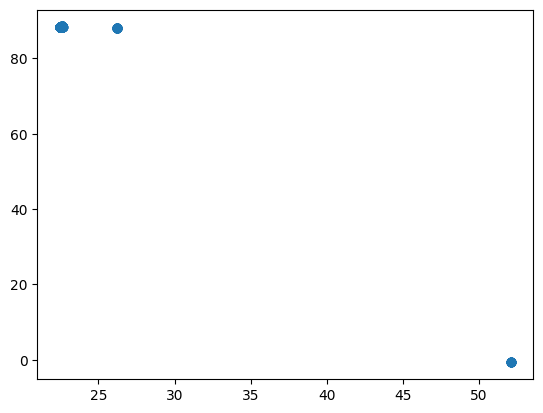

In [ ]:
plt.scatter(rest.latitudes,rest.longitudes)

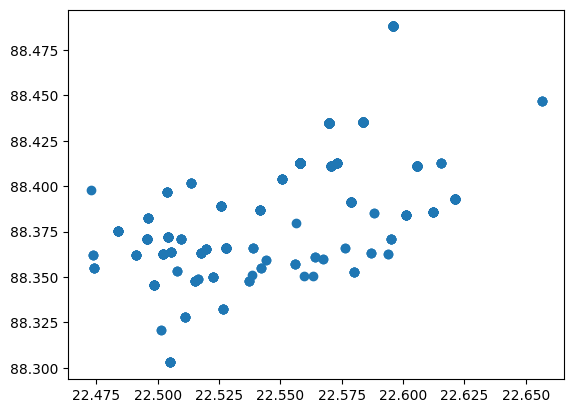

In [ ]:
rest = rest[(rest['longitudes'] >= 88) & (rest['latitudes'] <= 23)]
plt.scatter(rest.latitudes,rest.longitudes)

In [ ]:
kiosk.columns = ['latitudes', 'longitudes']
combined = pd.concat([rest, kiosk])
combined['labels'] = ['rest'] * len(rest) + ['kiosk'] * len(kiosk)

combined.head()

,Name,URL,Cuisines,Area,Timing,Full_Address,PhoneNumber,IsHomeDelivery,isTakeaway,isIndoorSeating,...,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost,latitudes,longitudes,labels
1,Chinese Food Corner,https://www.zomato.com/kolkata/chinese-food-co...,"Chinese, Seafood, Fast Food","Lake Gardens, Kolkata",Opens at 12noon,"87, Charu Chandra Place East, Near Lake Garden...",919124000000,1.0,1.0,0.0,...,0.0,-,11.0,NaN,NaN,NaN,150.0,22.508055,88.353329,rest
3,Bowlout,https://www.zomato.com/kolkata/bowlout-topsia,"Mexican, Italian, Oriental, American, Arabian,...","Topsia, Kolkata",NaN,"139/1G, Tiljala Road, Ward 065, Municipal Corp...",919331000000,1.0,0.0,0.0,...,0.0,3.3,129.0,NaN,NaN,"Food Tastes Great, Tamper Proof Packaging, Fre...",200.0,22.541802,88.386955,rest
4,Kapoor Pind Dhabaa,https://www.zomato.com/kolkata/kapoor-pind-dha...,"North Indian, Chinese","Paddapukur, Kolkata",NaN,"32/1A, Chakraberia Road South, Paddapukur, Kol...",918241000000,1.0,0.0,0.0,...,0.0,3.7,400.0,NaN,NaN,"Combos, Extensive Menu, Portions, Worth the Mo...",150.0,22.505024,88.302958,rest
5,The Yummy Eat's,https://www.zomato.com/kolkata/the-yummy-eats-...,"North Indian, Chinese, Fast Food","Kasba, Kolkata",NaN,"171/C/1, Kasba, Kolkata",918240000000,1.0,0.0,0.0,...,0.0,4,31.0,NaN,NaN,NaN,200.0,22.504435,88.372166,rest
6,Band Baaja Biryani,https://www.zomato.com/kolkata/band-baaja-biry...,"Biryani, North Indian, Beverages, Desserts","Hindustan Park, Kolkata",NaN,"19/1A, Biplabi Ambika Chakraborty Sarani, Ward...",919331000000,1.0,0.0,0.0,...,0.0,3.2,46.0,NaN,NaN,NaN,200.0,22.517702,88.363207,rest


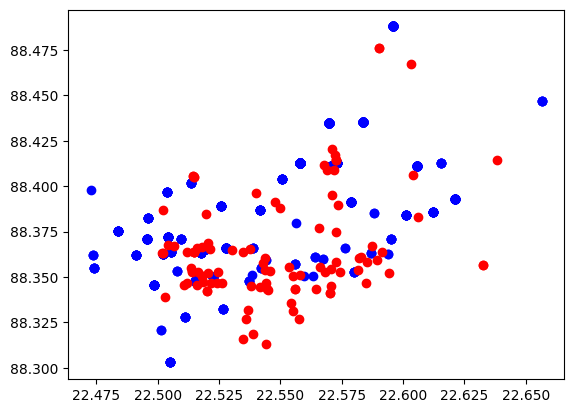

In [ ]:
plt.scatter(rest.latitudes,rest.longitudes,color="blue")
plt.scatter(kiosk.latitudes,kiosk.longitudes,color="red")

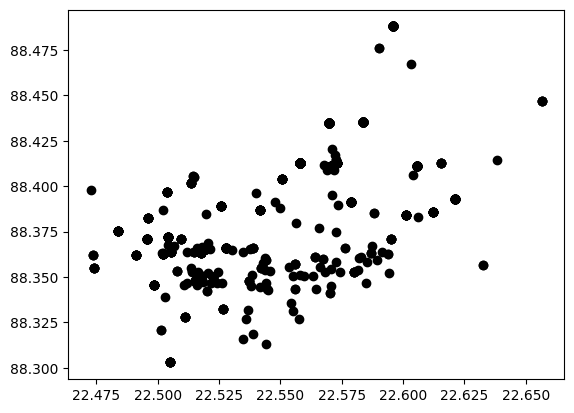

In [ ]:
plt.scatter(combined.latitudes,combined.longitudes,color="black")

In [ ]:
X = combined[['latitudes', 'longitudes']].values

X = X.reshape(-1, 2)
X

array([[22.5080547 , 88.3533289 ],
       [22.5418017 , 88.3869552 ],
       [22.50502445, 88.30295778],
       ...,
       [22.568384  , 88.352675  ],
       [22.572587  , 88.358032  ],
       [22.574206  , 88.352941  ]])

In [ ]:
len(rest)+len(kiosk)==len(X)

True

In [ ]:
k_range=range(1,10)
err=[]
for k in k_range:
  km=KMeans(n_clusters=k)
  km.fit_predict(X)
  err.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
err

[2.808474847732647,
 1.094333667776512,
 0.7543506300595899,
 0.49427696761766216,
 0.3915209741832717,
 0.3018072422618383,
 0.23301297366317247,
 0.19286576379202452,
 0.164697777616854]

In [ ]:
k = int(input("Enter a float number: "))

Enter a float number: 4


In [ ]:
km=KMeans(n_clusters=k)

In [ ]:
y_pre=km.fit_predict(X)
y_pre

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0,
       0, 2, 0, 0, 0, 3, 0, 0, 0, 2, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3,
       0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 2, 2, 3,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0,
       0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 3, 3, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 3, 3, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3,

In [ ]:
combined['map']=y_pre
combined

,Name,URL,Cuisines,Area,Timing,Full_Address,PhoneNumber,IsHomeDelivery,isTakeaway,isIndoorSeating,...,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost,latitudes,longitudes,labels,map
1,Chinese Food Corner,https://www.zomato.com/kolkata/chinese-food-co...,"Chinese, Seafood, Fast Food","Lake Gardens, Kolkata",Opens at 12noon,"87, Charu Chandra Place East, Near Lake Garden...",919124000000,1.0,1.0,0.0,...,-,11.0,NaN,NaN,NaN,150.0,22.508055,88.353329,rest,1
3,Bowlout,https://www.zomato.com/kolkata/bowlout-topsia,"Mexican, Italian, Oriental, American, Arabian,...","Topsia, Kolkata",NaN,"139/1G, Tiljala Road, Ward 065, Municipal Corp...",919331000000,1.0,0.0,0.0,...,3.3,129.0,NaN,NaN,"Food Tastes Great, Tamper Proof Packaging, Fre...",200.0,22.541802,88.386955,rest,1
4,Kapoor Pind Dhabaa,https://www.zomato.com/kolkata/kapoor-pind-dha...,"North Indian, Chinese","Paddapukur, Kolkata",NaN,"32/1A, Chakraberia Road South, Paddapukur, Kol...",918241000000,1.0,0.0,0.0,...,3.7,400.0,NaN,NaN,"Combos, Extensive Menu, Portions, Worth the Mo...",150.0,22.505024,88.302958,rest,1
5,The Yummy Eat's,https://www.zomato.com/kolkata/the-yummy-eats-...,"North Indian, Chinese, Fast Food","Kasba, Kolkata",NaN,"171/C/1, Kasba, Kolkata",918240000000,1.0,0.0,0.0,...,4,31.0,NaN,NaN,NaN,200.0,22.504435,88.372166,rest,1
6,Band Baaja Biryani,https://www.zomato.com/kolkata/band-baaja-biry...,"Biryani, North Indian, Beverages, Desserts","Hindustan Park, Kolkata",NaN,"19/1A, Biplabi Ambika Chakraborty Sarani, Ward...",919331000000,1.0,0.0,0.0,...,3.2,46.0,NaN,NaN,NaN,200.0,22.517702,88.363207,rest,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.553589,88.355628,kiosk,1
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.570551,88.345024,kiosk,0
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.568384,88.352675,kiosk,0
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.572587,88.358032,kiosk,0


In [ ]:
kiosk_df = combined[combined['labels'] == 'kiosk']
rest_df = combined[combined['labels'] == 'rest']

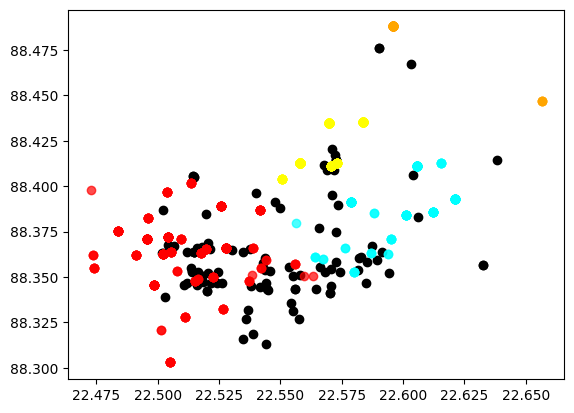

In [ ]:
plt.scatter(kiosk_df.latitudes,kiosk_df.longitudes,color="black")
color_map = {0: 'cyan', 1: 'red', 2: 'yellow', 3: 'orange'}
for label, color in color_map.items():
    plt.scatter(rest_df[rest_df['map'] == label]['latitudes'], rest_df[rest_df['map'] == label]['longitudes'], color=color, label=label, alpha=0.7)


# black are the kiosk

now for cooridnates, taking the input in coorodiante

In [ ]:
input_coordinates = input("first latitude then longitude: ")

Enter two float numbers separated by a space: 22.52555 88.35222


In [ ]:
float_strings = input_coordinates.split()
latitide = float(float_strings[0])
longi = float(float_strings[1])

In [ ]:
nearest = int(input("how many nearest rest "))

how many nearest rest 5


In [ ]:
distances = rest.apply(lambda row: ((row["latitudes"] - latitide)**2 + (row["longitudes"] - longi)**2)**0.5, axis=1)
nearest_restaurants = rest.iloc[distances.argsort()][:nearest]

# Print the 5 nearest restaurants
print("5 nearest restaurants:")
print(nearest_restaurants[["Name", "latitudes", "longitudes"]])

5 nearest restaurants:
                                           Name  latitudes  longitudes
93                               Wrap Ur Wraaps  22.522723   88.349924
103                                       Petuk  22.522723   88.349924
108  Khana Khazana New Chinese Fast Food Centre  22.522723   88.349924
823       Rollick- Ice Creams, Cakes & Desserts  22.522723   88.349924
913                                   Deja Bowl  22.522723   88.349924
